# 一.从图像png/jpg到四维tensor

无论我们的原始数据集是呈现什么样的格式，我们必须将其转换为四维的张量，数据才可以被卷积神经网络处理。

### 1.ImageFolder 

ImageFolder只能够读取根目录的子文件夹中的图片，并且一定会将子文件夹的名称作为类别。

使用ImageFolder读取后的数据是无法轻易更改标签的。

`torchvision.datasets.ImageFolder` 是 PyTorch 中用于加载**自定义图像数据集**的工具类，特别适合处理按“类别文件夹”组织的图像数据（这是最常见的自定义数据集存储方式）。以下是参数解释：

| 参数名      | 类型                          | 作用与说明                                                                 |
|-------------|-------------------------------|----------------------------------------------------------------------------|
| `root`      | 字符串（文件路径）            | 指定数据集的根目录（`XXXX` 需替换为实际路径）。<br>**关键要求**：根目录下必须按“类别”分文件夹存储图像，例如：<br>`root/`<br>&nbsp;&nbsp;`cat/`（存放所有“猫”类图像）<br>&nbsp;&nbsp;`dog/`（存放所有“狗”类图像）<br>&nbsp;&nbsp;`bird/`（存放所有“鸟”类图像）<br>每个子文件夹的名称会被自动作为该类别的标签。 |
| `transform` | `torchvision.transforms` 转换函数/组合 | 对图像的预处理操作（加载时自动应用）。<br>示例中 `ToTensor()` 的作用：将 PIL 图像（0-255 像素值）转换为 PyTorch 张量（Tensor），并归一化到 [0, 1] 范围，适配神经网络输入。<br>可根据需求添加更多转换（如 resize、裁剪等），例如：<br>`transform=transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])`。 |
| `target_transform`（可选） | 转换函数              | 对标签的预处理操作（默认 `None`，即不处理）。例如：若需将文件夹名称（字符串）转为数字索引，可自定义函数传入。 |






In [59]:
import os
import torchvision
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torchvision.transforms as transforms
import numpy as np


In [60]:
train_dataset =torchvision.datasets.ImageFolder(root="E:\使用数据集\datasets4\picturestotensor\Train",
                                        transform=torchvision.transforms.ToTensor()
                                       )

In [61]:
for x,y in train_dataset:
    print(x,y)
    break

tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9922, 0.9922, 0.9922,  ..., 0.9569, 0.9255, 0.9373],
         [0.9922, 0.9922, 0.9922,  ..., 0.9843, 0.9373, 0.9333],
         [0.9922, 0.9922, 0.9922,  ..., 1.0000, 0.9490, 0.9412]],

        [[0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
         [0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
         [0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.8549, 0.8549, 0.8549,  ..., 0.6784, 0.6667, 0.7020],
         [0.8549, 0.8549, 0.8549,  ..., 0.7059, 0.6784, 0.6980],
         [0.8549, 0.8549, 0.8549,  ..., 0.7255, 0.6941, 0.6980]],

        [[0.7529, 0.7529, 0.7529,  ..., 0.8588, 0.8588, 0.8588],
         [0.7529, 0.7529, 0.7529,  ..., 0.8588, 0.8588, 0.8588],
         [0.7529, 0.7529, 0.7529,  ..., 0.8588, 0.8588, 0.

In [62]:
#查看属性
train_dataset.classes

['female', 'male']

In [63]:
#查看对应标签 整体作用是：获取训练数据集中所有不重复的标签值，并按顺序排列返回。
np.unique(train_dataset.targets)

array([0, 1])

In [64]:
#查看地址
train_dataset.imgs

[('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000001.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000002.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000004.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000005.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000006.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000009.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000010.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000011.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000014.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000017.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000018.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000019.jpg', 0),
 ('E:\\使用数据集\\datasets4\\picturestotensor\\Train\\female\\000022.jpg', 0),
 ('E:\\使用数据集\\datasets4\\

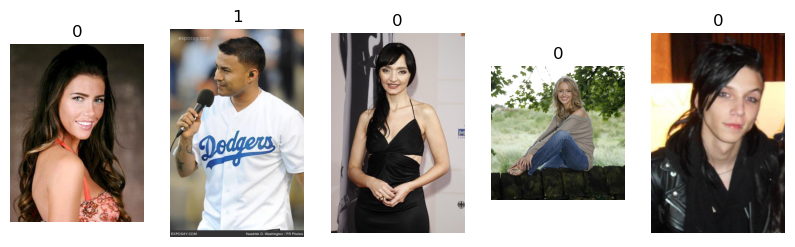

In [65]:
#同时，当数据集很大时，我们希望最好只读取一遍，所以一般还是会加上ToTensor
#此时我们就需要自己编写可视化的函数

#使用numpy和matplotlib将图像可视化
import matplotlib.pyplot as plt
import numpy as np
import random

#让每个数据集随机显示5张图像
def plotsample(data):
    fig, axs = plt.subplots(1,5,figsize=(10,10)) #建立子图
    for i in range(5):
        num = random.randint(0,len(data)-1) #首先选取随机数，随机选取五次
        #抽取数据中对应的图像对象，make_grid函数可将任意格式的图像的通道数升为3，而不改变图像原始的数据
        #而展示图像用的imshow函数最常见的输入格式也是3通道
        npimg = torchvision.utils.make_grid(data[num][0]).numpy()
        nplabel = data[num][1] #提取标签
        #将图像由(3, weight, height)转化为(weight, height, 3)，并放入imshow函数中读取
        axs[i].imshow(np.transpose(npimg, (1, 2, 0))) 
        axs[i].set_title(nplabel) #给每个子图加上标签
        axs[i].axis("off") #消除每个子图的坐标轴
plotsample(train_dataset)

## 2.自己写一个读取数据用的类


CLASS torch.utils.data.Dataset

在PyTorch中存在一个专门帮助我们构筑数据集的类Dataset，这个类在torch.utils.data模块下，属于
PyTorch中数据处理的经典父类之一（另一个我们总是使用的经典父类是nn.Module）。


Dataset中规定，如果一个子类要继承Dataset，则必须在子类中定义 __getitem__() 方法。从这个方
法的名字（get item，获取对象）也可以看出，它是帮助我们“获取对象”的方法。这个方法中的代码必须
满足三个功能：

1）读取单个图片并转化为张量

2）读取该图片对应的标签

3）将该图片的张量与对应标签打包成一个样本并输出


In [66]:
from skimage import io
import pandas as pd
import torch


In [67]:
io.imread(r"E:\使用数据集\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba\000001.jpg")#读取图片地址

array([[[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       ...,

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [244, 173, 121],
        [236, 170, 120],
        [239, 179, 129]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [251, 180, 126],
        [239, 173, 121],
        [238, 178, 128]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [255, 185, 126],
        [242, 177, 123],
        [240, 178, 127]]

In [68]:
#读取标签-identity 个体识别标签
identity=pd.read_csv(r"E:\使用数据集\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt",sep=" ",header=None)

identity.head() 是一个常见操作：

identity 通常指一个 DataFrame（数据表）对象，可能是从数据文件（如 CSV）中读取的数据。

.head() 是 DataFrame 的方法，用于返回数据表的前几行数据（默认返回前 5 行）。

In [69]:
identity.head()

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
